In [2]:
%load_ext autoreload
%autoreload
%matplotlib widget

import cProfile
import util


In [86]:
%autoreload

DATA_LOCATION = "D:/thesis_data/1hour_complete_22_01_10_05/"
DATA_LOCATION = "../raw_data/aicrowd/"

#cProfile.run("util.read_data(DATA_LOCATION)")
util.clear_db()
util.init_db()
util.read_data(DATA_LOCATION, format='AIcrowd')

Deleting old data


  0%|          | 0/1 [00:00<?, ?it/s]

training_1_category_1
Reading sensors
Writing sensors to DB
Reading Set 1
Writing 1974059 messages to DB
removing duplicate records
0 bad record keys
[]
Writing 4633478 records to DB


In [ ]:
%load_ext autoreload
%autoreload
%matplotlib widget

import util
util.visualize_timedrift()

In [87]:
%load_ext autoreload
%autoreload

import util
util.cleanup_sensors()
util.cleanup_messages()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Cleaning up sensors
Sensors with too high serverTimstamp variances: 0
Sensors with < 2 records: 0
Cleaning up messages
Deleting 207170 messages


Aggregating directional variances in flightpaths


  0%|          | 0/1549 [00:00<?, ?it/s]

0.0 quantile
0 (3.663068859676582e-07, '326   ')
Total Dist: 0.95 km
0.1 quantile
154 (0.0036710186037214564, '2742  ')
Total Dist: 38.33 km
0.2 quantile
309 (0.01860670059395162, '1923  ')
Total Dist: 986.95 km
0.3 quantile
464 (0.03390325478278046, '1416  ')
Total Dist: 206.71 km
0.4 quantile
619 (0.059156607331621064, '511   ')
Total Dist: 438.28 km
0.5 quantile
774 (0.09399676711099118, '2195  ')
Total Dist: 430.88 km
0.6 quantile
928 (0.13407383785818927, '1569  ')
Total Dist: 85.31 km
0.7 quantile
1083 (0.19357171840493376, '1350  ')
Total Dist: 411.16 km
0.8 quantile
1238 (0.27083233022983033, '942   ')
Total Dist: 508.69 km
0.9 quantile
1393 (0.3964434864403491, '2367  ')
Total Dist: 451.86 km
1.0 quantile
1548 (0.9997483963710425, '1042  ')
Total Dist: 359.6 km


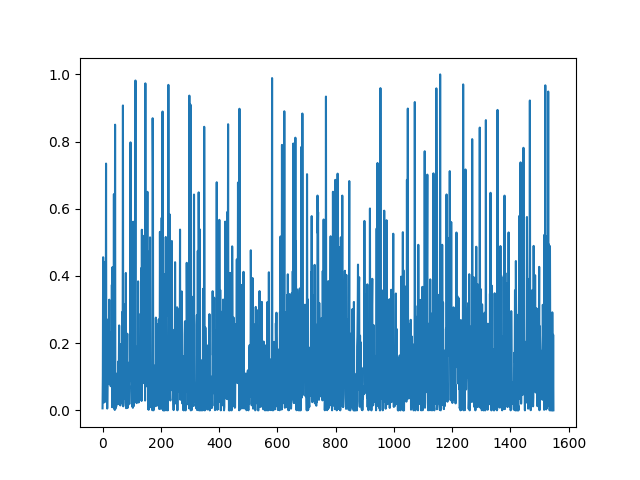

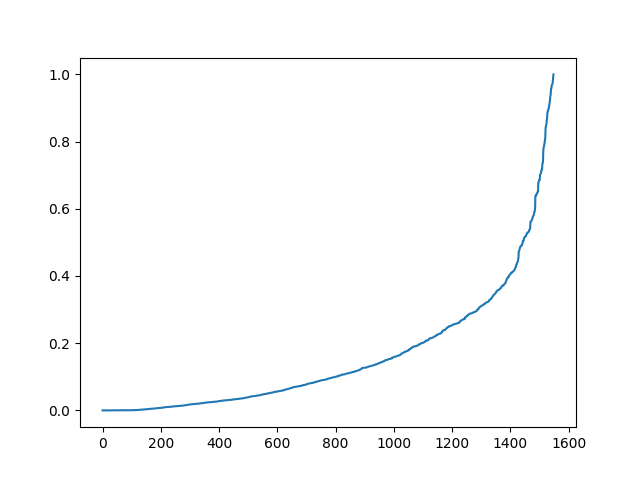

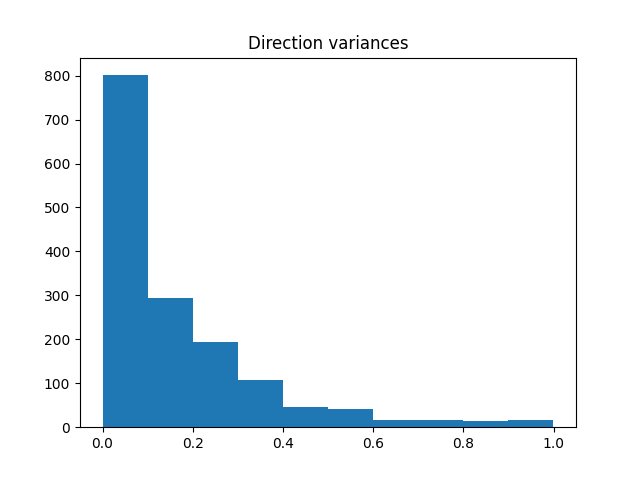

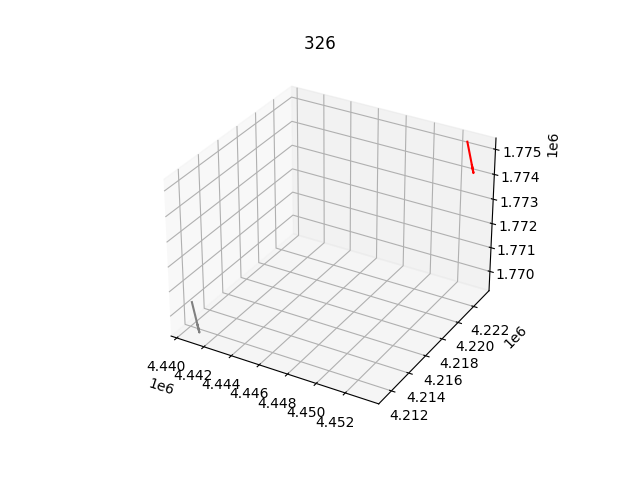

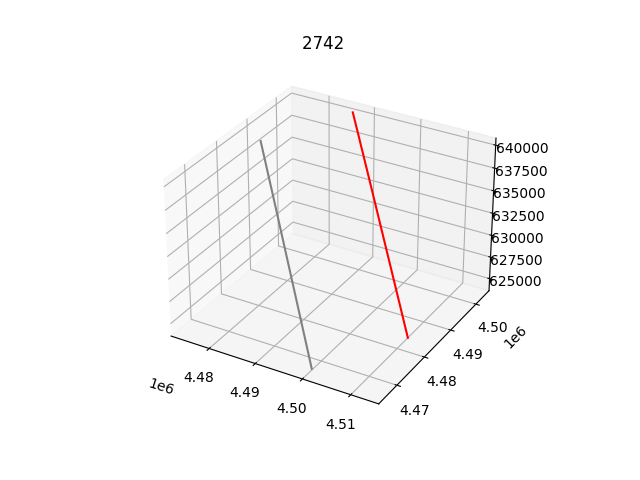

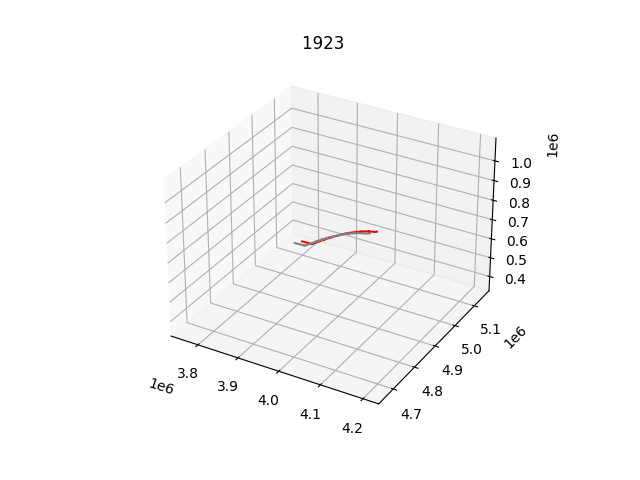

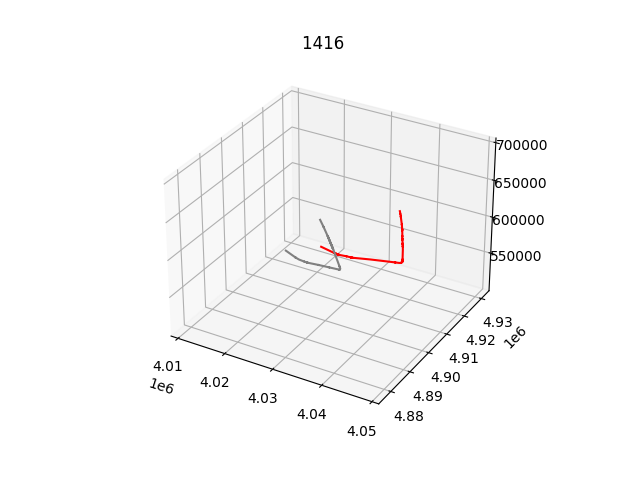

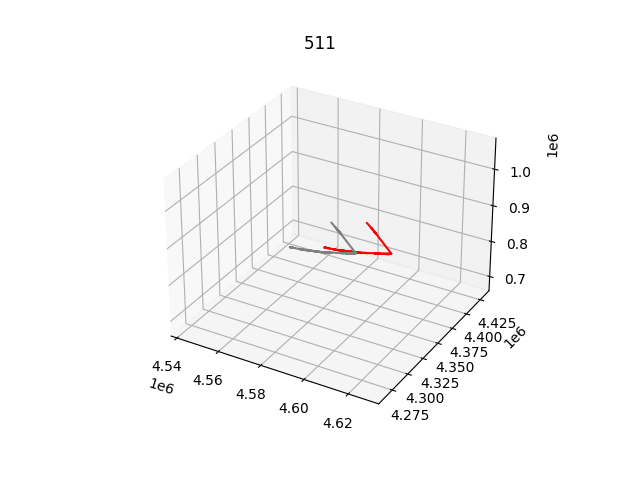

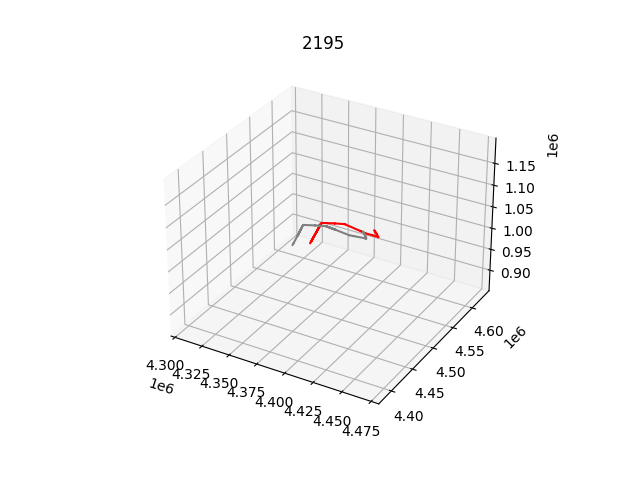

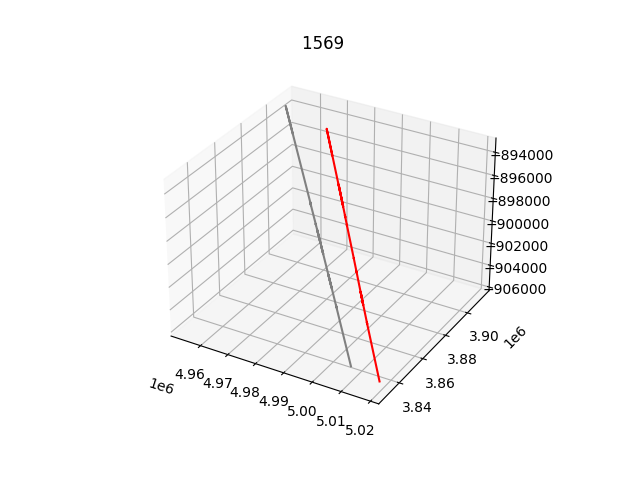

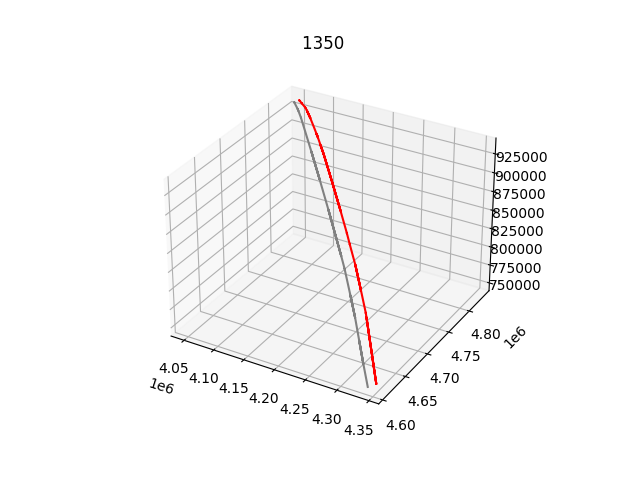

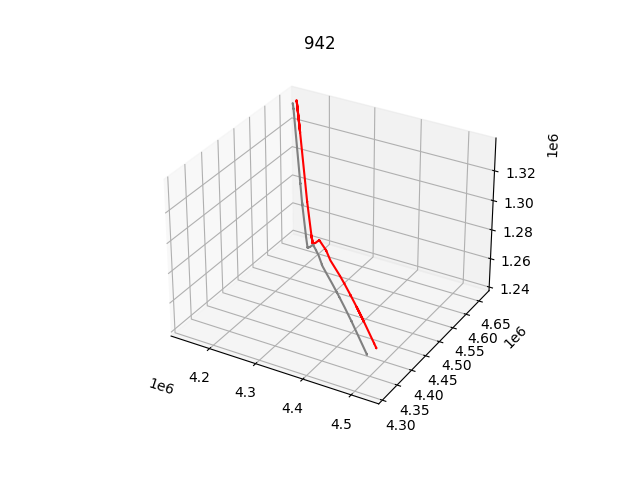

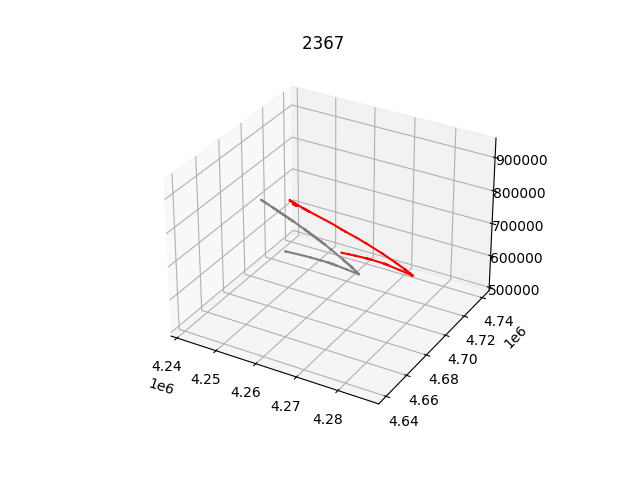

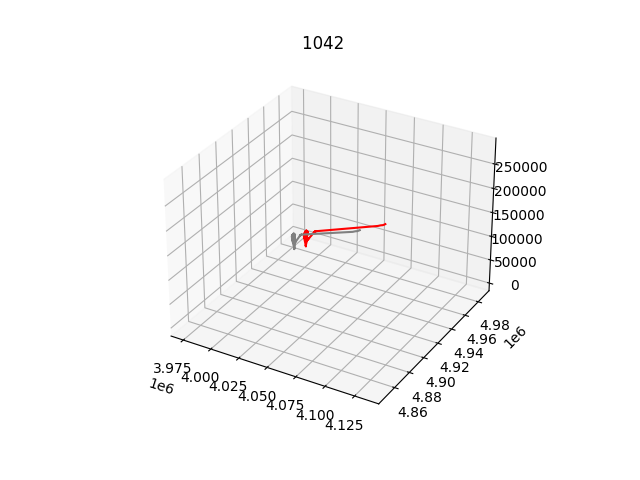

In [27]:
%autoreload
util.cleanup_flightpaths(outlier_dist_cutoff=1e3, variance_cutoff=0.4)

In [78]:
%autoreload
#util.visualize_flightpaths(icao='410')
util.visualize_flightpaths(icao='415')

TypeError: cannot unpack non-iterable NoneType object

In [49]:
%load_ext autoreload
%autoreload

import timedelta_utils
from pstats import Stats

timedelta_utils.calc_timedeltas()
#timedelta_utils.propagate_timedeltas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/139 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
n sensors: 80
connected sensor pairs: 249 / 6320 (3%)
Mean mean: 2.0778938476759117e-05
Mean variance: 1.896020793852962e-08
Max variance: 2.030213323831947e-07 sensors: (133, 195, 0.0005479759279207789, 2.030213323831947e-07)
3559 3559
max_i 1013
334.367054843 333.413000106812
335.367287937 333.413000106812
(1.0002330940000093, 1013)


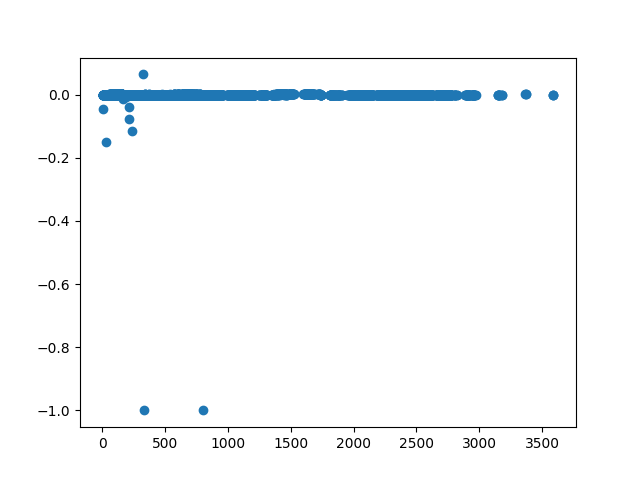

In [50]:
%load_ext autoreload
%autoreload
timedelta_utils.timedelta_statistics()

In [44]:
# test box for mlat

%load_ext autoreload
%autoreload
%matplotlib widget

import mlat_utils
from util import GeoPoint
from collections import defaultdict

C = 299792458
sensor_ids = list(range(4))
sensor_locations = {
    0: GeoPoint('ecef', C+7, 0, 6),
    1: GeoPoint('ecef', 19, C-12, 0),
    2: GeoPoint('ecef', 15, 47, C),
    3: GeoPoint('ecef', C, -C, 1),
    4: GeoPoint('ecef', C+10, 20, -30),
    5: GeoPoint('ecef', 0, 0, 0)
}

sensor_timestamps = {
    0: 1,
    1: 1,
    2: 1,
    3: 2**0.5,
    4: 1,
    5: 0
}

time_deltas = {i: {j: (0, 0) for j in sensor_ids} for i in sensor_ids}

pos = mlat_utils.calc_mlat(sensor_ids, sensor_locations, sensor_timestamps, time_deltas, debug=True)
print(pos.pos() if pos else "None")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
N Sensors: 4
Initial sensor subset: [0, 1, 2, 3]
Using 4 / 4 sensors for MLAT
[0, 1, 2, 3]
sensors center point: [ 1.49896240e+08 -6.00000000e+00  1.49896229e+08]
centered sensor locations: [array([ 1.49896225e+08,  6.00000000e+00, -1.49896223e+08]), array([-1.49896221e+08,  2.99792452e+08, -1.49896229e+08]), array([-1.49896225e+08,  5.30000000e+01,  1.49896229e+08]), array([ 1.49896218e+08, -2.99792452e+08, -1.49896228e+08])]
corrected timestamps: [0, 0, 0, 0.41421356237309515]
self.nodes
[[ 1.49896225e+08  6.00000000e+00 -1.49896223e+08]
 [-1.49896221e+08  2.99792452e+08 -1.49896229e+08]
 [-1.49896225e+08  5.30000000e+01  1.49896229e+08]
 [ 1.49896218e+08 -2.99792452e+08 -1.49896228e+08]]
times
[0.         0.         0.         0.41421356]
times * v
[(0.0,), (0.0,), (0.0,), (124178102.0007665,)]
A:
[[ 1.49896225e+08  6.00000000e+00 -1.49896223e+08  0.00000000e+00]
 [-1.49896221e+08  2.99792452e+08

In [60]:
%load_ext autoreload
%autoreload
%matplotlib widget
import cProfile
import mlat_utils
from pstats import Stats

#pr = cProfile.Profile()
#pr.enable()

# use_sympy:
# sympy solves mlat least squares with arbitrary precision
# Takes much longer, but prevents numerical instabilities
mlat_utils.calc_positions(variance_cutoff=1e-8, use_sympy=False, limit=-1000)

#pr.disable()
#stats = Stats(pr)
#stats.sort_stats('tottime').print_stats(25)

# Check calculated position quality
mlat_utils.summarize_accuracy('raw')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/239637 [00:00<?, ?it/s]

Number of received messages: (1766889,)
Number of calculated positions: (42059,)
Best dist: 1063.9124273387274
Worst dist: 30858348361.59931
Mean dist: 7755312.877003414
Median dist: 50767.9785528236


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
N messages: 266
N messages: 458
N messages: 3
N messages: 113
N messages: 6


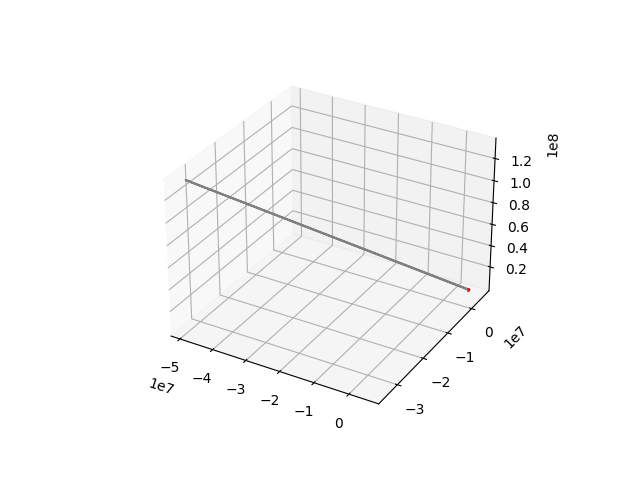

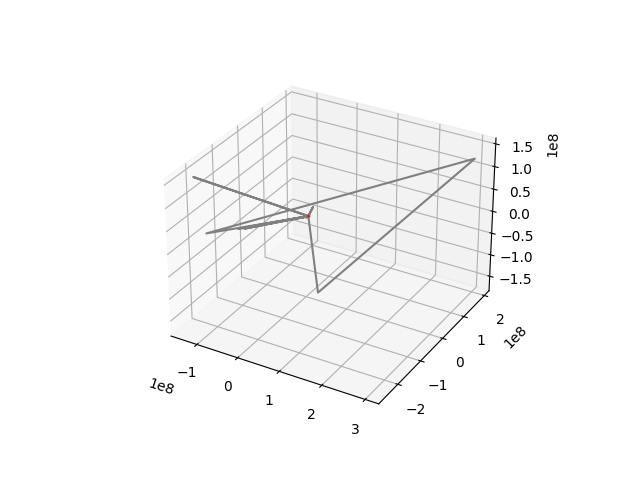

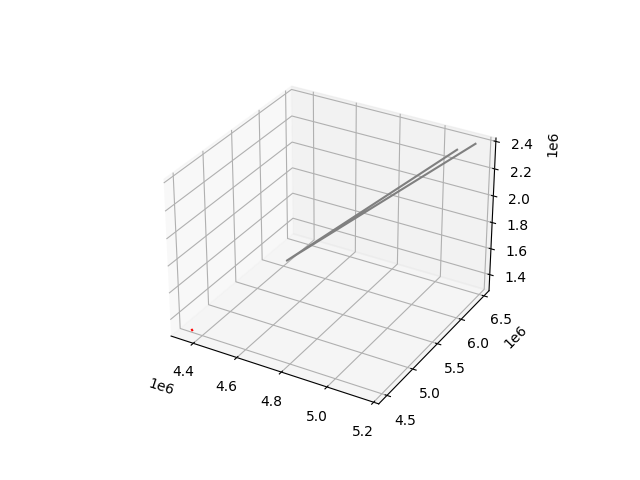

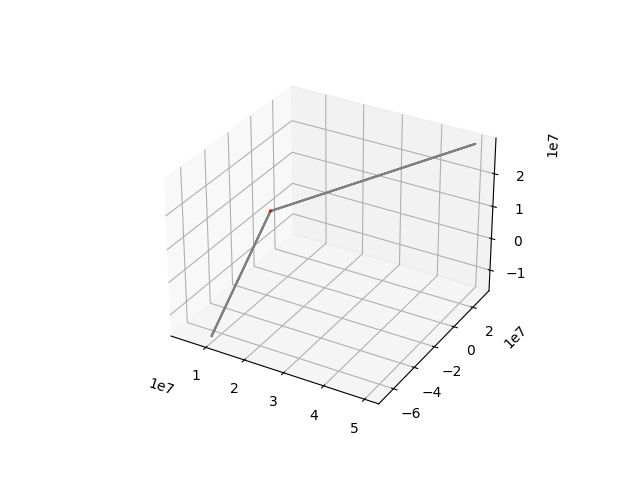

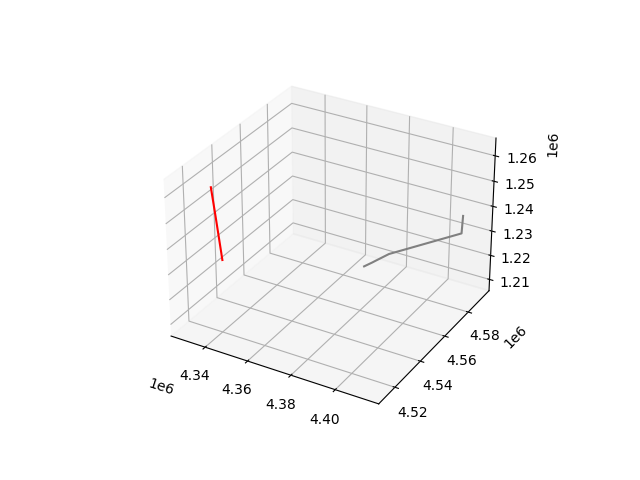

In [61]:
# check the results visually

import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.visualize_flight_paths('raw')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/329 [00:00<?, ?it/s]

Removed 1 / 3 positions
Removed 31 / 587 positions
Removed 10 / 107 positions
Removed 20 / 85 positions
Removed 2 / 2 positions
Removed 1 / 13 positions
Removed 1 / 5 positions
Removed 34 / 197 positions
Removed 25 / 589 positions
Removed 5 / 21 positions
Removed 1 / 121 positions
Removed 28 / 172 positions
Removed 0 / 56 positions
Removed 24 / 81 positions
Removed 7 / 10 positions
Removed 0 / 15 positions
Removed 21 / 96 positions
Removed 18 / 450 positions
Removed 26 / 38 positions
Removed 6 / 18 positions
Removed 47 / 241 positions
Removed 3 / 13 positions
Removed 23 / 110 positions
Removed 0 / 4 positions
Removed 1 / 1 positions
Removed 27 / 137 positions
Removed 0 / 41 positions
Removed 18 / 399 positions
Removed 1 / 1 positions
Removed 1 / 8 positions
Removed 9 / 19 positions
Removed 3 / 37 positions
Removed 6 / 111 positions
Removed 0 / 11 positions
Removed 71 / 458 positions
Removed 3 / 37 positions
Removed 8 / 51 positions
Removed 1 / 1 positions
Removed 0 / 2 positions
Remove

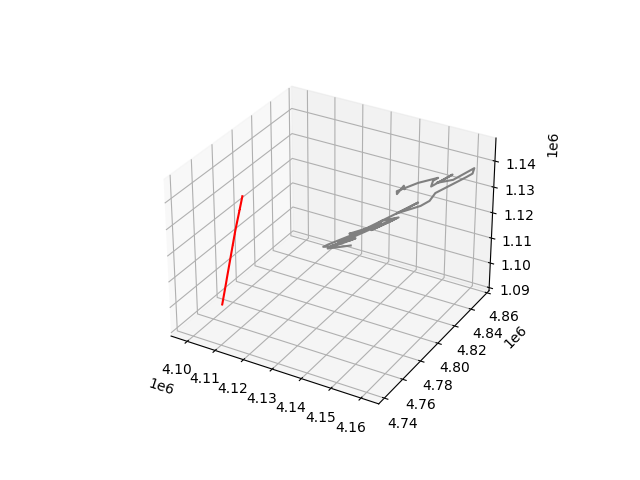

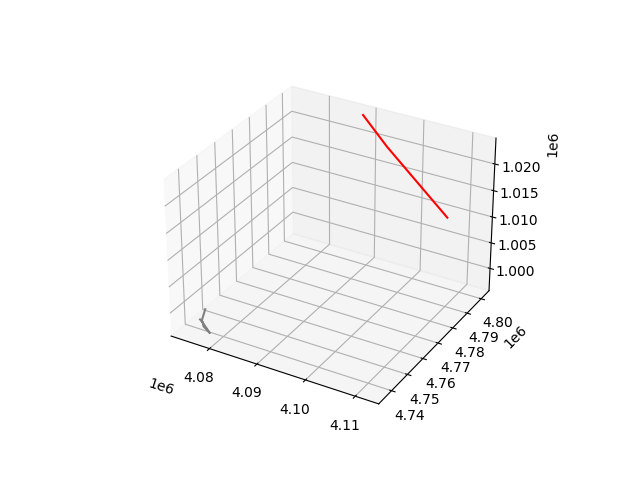

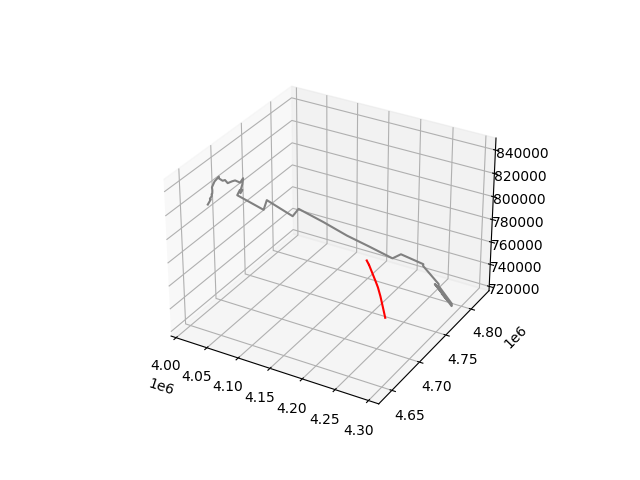

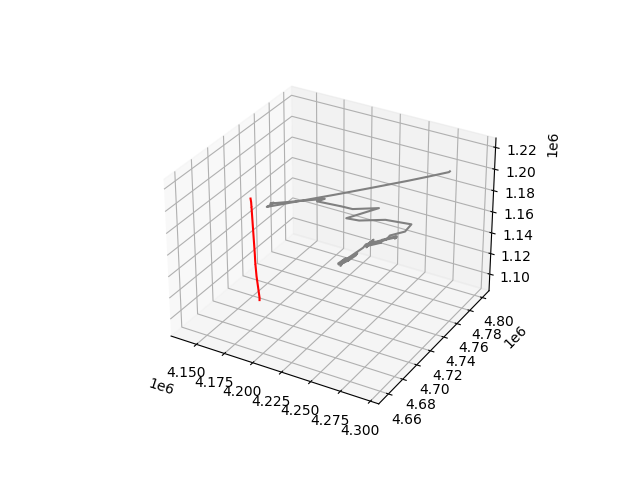

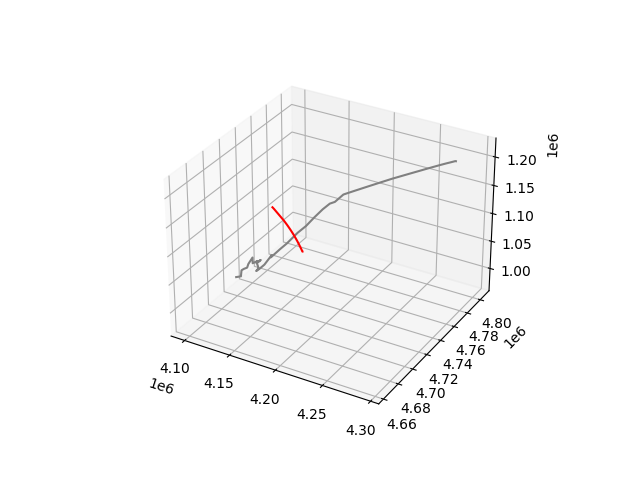

In [62]:
# do contextual adjustments to calculated positions
import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.post_process_positions()
mlat_utils.visualize_flight_paths('corrected')
mlat_utils.summarize_accuracy('corrected')

In [11]:
util.close_db()